<a href="https://colab.research.google.com/github/rkhiar/IA/blob/master/Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# sklearn tutorial :

## Linear regression :
Linear regression tutorial using  boston estate market dataset. 


#################################
DataFrame
#################################
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  
#################################
Comparative matrix
#################################
   PREDICTED  REAL
0  31.114396  28.4
1  31.820602  31.1
2  30.556206  23.5
3  22.440421  26.6
4  18.803988  19.6
#################################
The MSE
##############################

Text(0.5,1,'Prices vs Predicted prices')

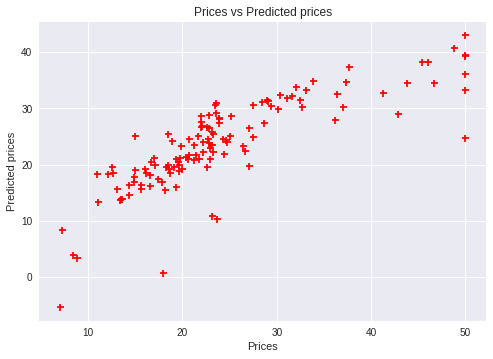

In [0]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



from sklearn.datasets import load_boston
boston = load_boston()


# load_boston is a dictionary !!!!!!!!!!!!!!!!!!

#print(boston.keys())
#print(boston.data)
#print(boston.feature_names)
#print(boston.DESCR)


#DataFrame creation whith boston data
bos = pd.DataFrame(boston.data, columns=boston.feature_names)
# Columns header update with boston feature_names
#bos.columns = boston.feature_names


# DataFrame append with targer values 'PRICES'
bos['PRICE']=boston.target


print("""#################################""")
print("""DataFrame""")
print("""#################################""")
print(bos.head())


#Describe function returning all the basic satistics of our DataFrame
#print(bos.describe())

# X and y martices creation 
y=bos['PRICE']
X = bos.drop('PRICE', axis = 1)


# Spliting our matrices X and Y on training and testing rows
# Parameter test_sizen of method  "train_test_split" precise the DataTest proportion on our original DataFrame
        # In our example we'll have 25% DataTest for 75% DataTrain
        # We can check it with the set of shape print bellow
# Filling the parameter random_state of method  "train_test_split"  allows the same random spliting of our DataFrame
        # The value filled doesn't matter, 10, 32, 5, .... hhave the same result
#X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.25, random_state=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)


# LinearRegression class Instantiation
#lm = sklearn.linear_model.LinearRegression()
lm = LinearRegression()

# We call the learning method of our object lm
lm.fit(X_train, y_train)

# We call the predicting method of our object lm
Y_pred = lm.predict(X_test)


# Comparative DataFrame construction between y_test and Y_pred
res=pd.DataFrame(Y_pred.reshape(Y_pred.shape[0],1), columns=np.array(['PREDICTED']))
res['REAL']=np.array(y_test)

print("""#################################""")
print("""Comparative matrix""")
print("""#################################""")
print(res.head())



# MSE Calculation 
mse = sklearn.metrics.mean_squared_error(y_test, Y_pred)
print("""#################################""")
print("The MSE")
print("""#################################""")
print(mse)

# weights
print("""#################################""")
print("Our W")
print("""#################################""")
print(lm.coef_.shape)

print("""#################################""")
print("Our b")
print("""#################################""")
print(lm.intercept_)



# Plotting the results
plt.scatter(y_test, Y_pred, color='red', marker='+')
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")





## Logistic regression :
### Binary classification
Logistic regression tutorial using  breast cancer dataset. 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()


#print(cancer.keys())
#print(cancer.data)
#print(cancer.feature_names)
#print(cancer.target_names)
#print(cancer.target)
#print(cancer.DESCR)

#DataFrame creation whith load_breast_cancer data
canc = pd.DataFrame(cancer.data, columns=cancer.feature_names)


# Diagnostic column creation on DataFrame canc
canc['diagnostic']=cancer.target


print("""#################################""")
print("""DataFrame""")
print("""#################################""")
print(canc.head())

#  X and y matrices construction
y=canc['diagnostic']
X = canc.drop('diagnostic', axis = 1)


# Spliting our matrices X and Y on training and testing rows
# Parameter test_size of method  "train_test_split" precise the DataTest proportion on our original DataFrame
        # In our example we'll have 25% DataTest for 75% DataTrain
        # We can check it with the set of shape print bellow
# Filling the parameter random_state of method  "train_test_split"  allows the same random spliting of our DataFrame
        # The value filled doesn't matter, 10, 32, 5, .... hhave the same result
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)


# Logistic Regression class Instantiation
logReg = LogisticRegression()

# We call the learning method of our object lm
logReg.fit(X_train,y_train)

# We call the predicting method of our object lm
Y_pred = logReg.predict(X_test)


# Comparative DataFrame construction between y_test and Y_pred
res=pd.DataFrame(Y_pred.reshape(Y_pred.shape[0],1), columns=np.array(['PREDICTED']))
res['REAL']=np.array(y_test)

print("""#################################""")
print("""Comparative matrix""")
print("""#################################""")
print(res.head())


# The function score is kind of a loss function 
# The more our prediction on data test is accurate, the more score fuction will be close to 1 

print("""#################################""")
print("""Score fuction""")
print("""#################################""")
print(logReg.score(X_test, y_test))


#################################
DataFrame
#################################
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fracta

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Multiclass classification
Logistic regression tutorial using  digits recognition  dataset. 

#################################
Image example 
#################################
#################################
DataFrame (head) 
#################################
     0    1    2     3     4     5    6    7    8    9 ...    55   56   57  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0 ...   0.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   

    58    59    60    61   62   63  num  
0  6.0  13.0  10.0   0.0  0.0  0.0    0  
1  0.0  11.0  16.0  10.0  0.0  0.0    1  
2  0.0   3.0  11.0  16.0  9.0  0.0    2  
3  7.0  13.0  13.0   9.0  0.0  0.0    3  
4  0.0   2.0  16.0   4.0  0.0  0.0    4  

[5 rows x 65 columns]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


#################################
Comparative matrix
#################################
   PREDICTED  REAL
0          5     5
1          2     2
2          5     5
3          4     4
4          1     8
#################################
Score fuction
#################################
0.9577777777777777
#################################
Confusion Matrix
#################################


Text(69,0.5,'Truth')

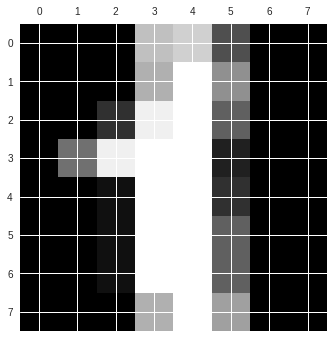

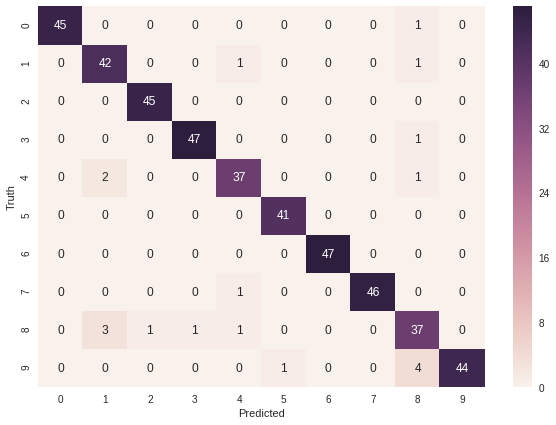

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


from sklearn.datasets import load_digits
digits = load_digits()



#print(digits.keys())
#print(digits.data)
#print(digits.target_names)
#print(digits.target)
#print(digits.DESCR)

# To display the picture stored in digits.images 
print("""#################################""")
print("""Image example """)
print("""#################################""")
plt.gray()
plt.matshow(digits.images[1])


#DataFrame creation whith load_digits data
dig = pd.DataFrame(digits.data)


# Target column creation on DataFrame dig
# Target represent the real result
dig['num']=digits.target


print("""#################################""")
print("""DataFrame (head) """)
print("""#################################""")
print(dig.head())

#  X and y matrices construction
y=dig['num']
X = dig.drop('num', axis = 1)


# Spliting our matrices X and Y on training and testing rows
# Parameter test_size of method  "train_test_split" precise the DataTest proportion on our original DataFrame
        # In our example we'll have 25% DataTest for 75% DataTrain
        # We can check it with the set of shape print bellow
# Filling the parameter random_state of method  "train_test_split"  allows the same random spliting of our DataFrame
        # The value filled doesn't matter, 10, 32, 5, .... have the same result
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)


# Logistic Regression class Instantiation
logReg = LogisticRegression()

# We call the learning method of our object logReg
logReg.fit(X_train,y_train)

# We call the predicting method of our object logReg
y_pred = logReg.predict(X_test)



# Comparative DataFrame construction between y_test and Y_pred
res=pd.DataFrame(y_pred.reshape(y_pred.shape[0],1), columns=np.array(['PREDICTED']))
res['REAL']=np.array(y_test)

print("""#################################""")
print("""Comparative matrix""")
print("""#################################""")
print(res.head())


# The function score is a performance function 
# The more our prediction on data test is accurate, the more score fuction will be close to 1 

print("""#################################""")
print("""Score fuction""")
print("""#################################""")
print(logReg.score(X_test, y_test))



# Confusion matrix construction
# This matrix arellows a visualisation of the prediction accurency  
# Each data crossing represent how many time a truth value (y axis) has been predicted by a predicted value (x axis)
# All values out of the diagonal are wrong predictions

cm=confusion_matrix(y_test, y_pred)

print("""#################################""")
print("""Confusion Matrix""")
print("""#################################""")
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

